In [44]:
import pandas as pd # pandas library for data manipulation and analysis
import numpy as np  #numpy library for numerical operations and array handling
import re #regular expressions library for string searching and manipulation
import matplotlib.pyplot as plt  #pyplot module from matplotlib for creating static visualizations
import seaborn as sns # seaborn library for statistical data visualization
import missingno as msno #issingno library for visualizing missing data in datasets
from scipy import stats #tats module from the scipy library for statistical functions and tests

Loading the dataset

In [45]:
file_path ='dataset.csv'
df=pd.read_csv(file_path)
df

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,NaN,DA,1 oseba,Diplomiral,NE,873.333333,1.0,14xx,SI,NaN,NAJEM,57750.0,90.0,2.89%,NaN,kartica,Y
38763,20271,32616,Moški,NE,0 oseb,Diplomiral,NE,3107.666667,1.0,63xx,Slo,3 leta,STANOVANJSKI KREDIT,17500.0,90.0,1.52%,Posojilojemalec je dodal na 02-06-14 > Samo o...,NaN,Y
38764,27733,46393,Ženska,DA,NaN,Diplomiral,DA,800.000000,0.0,42xx,SI,2 leti,LASTNO,58800.0,90.0,2.50%,NaN,NaN,N
38765,42707,20062,Moški,DA,3+ osebe,Diplomiral,NE,1365.000000,NaN,84xx,SI,3 leta,STANOVANJSKI KREDIT,43050.0,120.0,1.78%,NaN,NaN,Y


In [46]:
# print a summary of the DataFrame's structure
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  38767 non-null  int64  
 1   ApplicantID             38767 non-null  int64  
 2   ApplicantGender         37902 non-null  object 
 3   ApplicantMarried        38573 non-null  object 
 4   ApplicantDependents     37775 non-null  object 
 5   ApplicantEducation      38767 non-null  object 
 6   ApplicantSelfEmployed   36702 non-null  object 
 7   ApplicantIncome         38767 non-null  float64
 8   ApplicantCreditHistory  35687 non-null  float64
 9   ApplicantZIP            38767 non-null  object 
 10  ApplicantState          38767 non-null  object 
 11  ApplicantEmplLength     36924 non-null  object 
 12  ApplicantHomeOwn        38767 non-null  object 
 13  LoanAmount              37370 non-null  float64
 14  LoanTerm                37863 non-null

In [47]:
# print the shape of dataset
df.shape

(38767, 19)

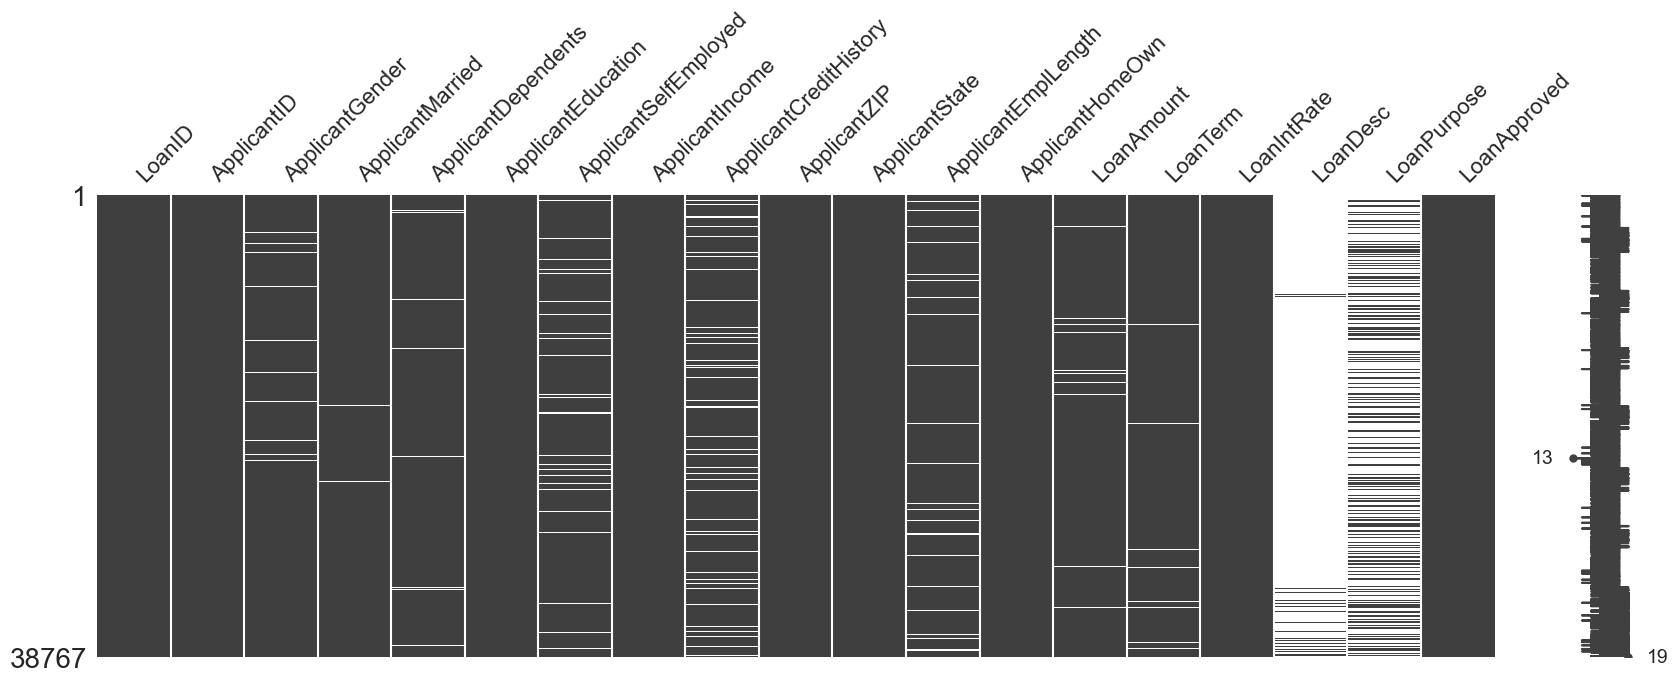

In [48]:
# missing data matrix plot
msno.matrix(df, figsize=(20, 6))
plt.show()

In [49]:
# print descriptive statistics for the numerical columns
print(df.describe().T)

                          count          mean           std     min      25%  \
LoanID                  38767.0  34552.451441  19888.051126     1.0  17433.5   
ApplicantID             38767.0  34544.994918  19990.383285     1.0  17141.5   
ApplicantIncome         38767.0   1801.602781   2013.534166    50.0    963.0   
ApplicantCreditHistory  35687.0      0.842099      0.364653     0.0      1.0   
LoanAmount              37370.0  51087.712069  29882.568304  3150.0  35000.0   
LoanTerm                37863.0     85.473576     16.198891     3.0     90.0   

                            50%           75%       max  
LoanID                  34460.0  51691.000000   69133.0  
ApplicantID             34480.0  51847.500000   69134.0  
ApplicantIncome          1271.0   1933.333333   27000.0  
ApplicantCreditHistory      1.0      1.000000       1.0  
LoanAmount              44800.0  58450.000000  245000.0  
LoanTerm                   90.0     90.000000     120.0  


In [50]:
# print descriptive statistics for object-type columns
df.describe(include=['O'])

,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
count,37902,38573,37775,38767,36702,38767,38767,36924,38767,38767,1521,14845,38767
unique,2,2,4,2,2,44,5,11,3,65,1119,9,2
top,Moški,DA,0 oseb,Diplomiral,NE,33xx,SI,10+ let,STANOVANJSKI KREDIT,3.12%,IzPosojilojemalec je dodal na 03-17-14 > kons...,kartica,Y
freq,30882,25099,21803,30132,31538,3259,19357,12695,19667,2041,9,9048,32482


In [51]:
# llogarit perqindjen e rreshtave te dyfishte ne DataFrame
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


<Axes: >

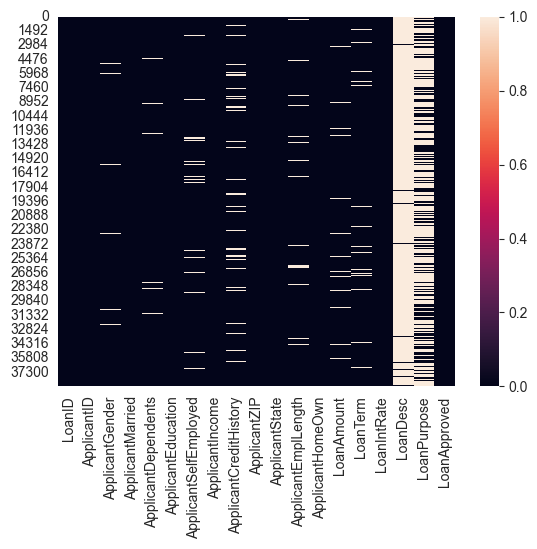

In [52]:
#  checks for missing values in a DataFrame df
sns.heatmap(df.isnull())

In [53]:
# Calculate and display missing values and their percentage, sorted by percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)


Missing values in the dataset:
                         Missing Values  Percentage
ApplicantMarried                   194    0.500426
ApplicantGender                    865    2.231279
LoanTerm                           904    2.331880
ApplicantDependents                992    2.558877
LoanAmount                        1397    3.603580
ApplicantEmplLength               1843    4.754043
ApplicantSelfEmployed             2065    5.326695
ApplicantCreditHistory            3080    7.944902
LoanPurpose                      23922   61.707122
LoanDesc                         37246   96.076560


In [54]:
# Drop 'LoanDesc' and 'ApplicantState' columns from the dataframe.
df.drop(['LoanDesc', 'ApplicantState'], axis=1, inplace=True)

In [55]:
# Replace categorical values in 'ApplicantDependents' with numerical values and convert the column to float type
df['ApplicantDependents'] = df['ApplicantDependents'].replace({
    '0 oseb': 0, '1 oseba': 1, '2 osebi': 2, '3+ osebe': 3
}).astype('float')

In [56]:
# Remove 'xx' from 'ApplicantZIP' column and convert it to integer type
df['ApplicantZIP'] = df['ApplicantZIP'].str.replace('xx', '').astype(int)

print(df[['ApplicantZIP']].head())

   ApplicantZIP
0            33
1            64
2            30
3            84
4            60


In [57]:
# Replace the values in 'ApplicantGender' column with 'Male' and 'Female' for better clarity
df['ApplicantGender'] = df['ApplicantGender'].replace({'Moški': 'Male', 'Ženska': 'Female'})

In [58]:
# Function to clean and convert employment length values
def clean_employment_length(value):
    if isinstance(value, str):
        match = re.search(r"(\d+)", value)
        if match:
            return float(match.group(1))
        elif "< 1" in value:
            return 0.5
    return value

In [59]:
# apply the clean_employment_length function to the 'ApplicantEmplLength' column  and convert the result to float
df['ApplicantEmplLength'] = df['ApplicantEmplLength'].apply(clean_employment_length).astype('float')

In [60]:
# Remove the '%' symbol from the 'LoanIntRate' column and convert the values to float
df['LoanIntRate']= df['LoanIntRate'].str.replace('%','').astype('float')

In [61]:
# Fill missing values in specific columns with appropriate methods
df['LoanTerm'].fillna(df['LoanTerm'].mode()[0], inplace=True)
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)
df['LoanPurpose'].fillna('Unknown', inplace=True)
for column in ['ApplicantDependents', 'ApplicantEmplLength']: 
   df[column].fillna(df[column].median(), inplace=True)

for column in ['ApplicantGender', 'ApplicantMarried', 'ApplicantSelfEmployed', 'ApplicantCreditHistory']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [62]:
df

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved
0,56026,19874,Male,NE,0.0,Diplomiral,NE,1949.666667,1.0,33,5.0,STANOVANJSKI KREDIT,51087.0,90.0,1.42,prenova,Y
1,53884,34258,Male,DA,1.0,Diplomiral,NE,1527.666667,1.0,64,10.0,NAJEM,44800.0,90.0,3.90,drugo,N
2,48350,66552,Male,DA,0.0,Brez diplome,NE,861.000000,1.0,30,3.0,NAJEM,42000.0,90.0,2.80,Unknown,Y
3,30455,54844,Male,DA,2.0,Diplomiral,NE,1066.666667,1.0,84,1.0,NAJEM,24500.0,90.0,3.26,Unknown,Y
4,935,18820,Male,DA,2.0,Diplomiral,NE,833.333333,1.0,60,10.0,STANOVANJSKI KREDIT,38150.0,90.0,3.26,Unknown,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,Male,DA,1.0,Diplomiral,NE,873.333333,1.0,14,7.0,NAJEM,57750.0,90.0,2.89,kartica,Y
38763,20271,32616,Male,NE,0.0,Diplomiral,NE,3107.666667,1.0,63,3.0,STANOVANJSKI KREDIT,17500.0,90.0,1.52,Unknown,Y
38764,27733,46393,Female,DA,0.0,Diplomiral,DA,800.000000,0.0,42,2.0,LASTNO,58800.0,90.0,2.50,Unknown,N
38765,42707,20062,Male,DA,3.0,Diplomiral,NE,1365.000000,1.0,84,3.0,STANOVANJSKI KREDIT,43050.0,120.0,1.78,Unknown,Y


For each numeric column in the dataset, the code below  generates two side-by-side plots:

KDE plot: Helps visualize if the data follows a normal distribution.
Box plot: Helps detect the spread, skewness, and outliers in the data.

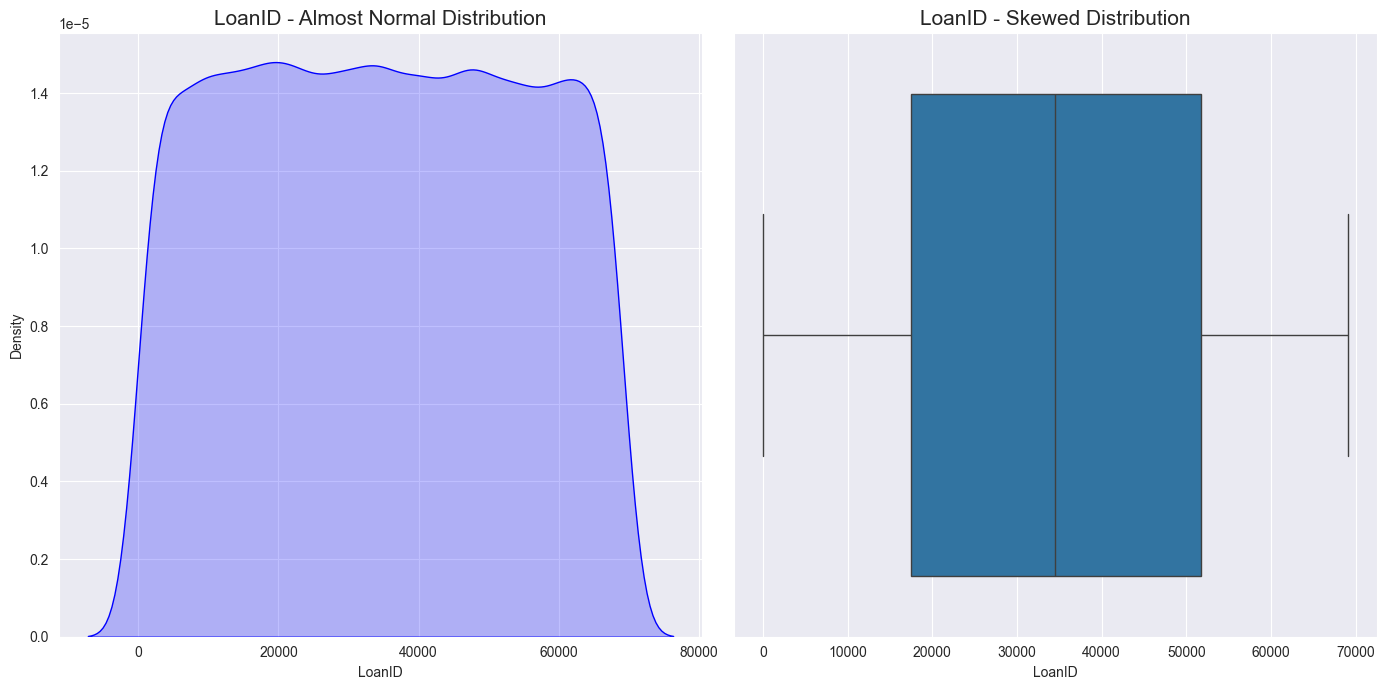

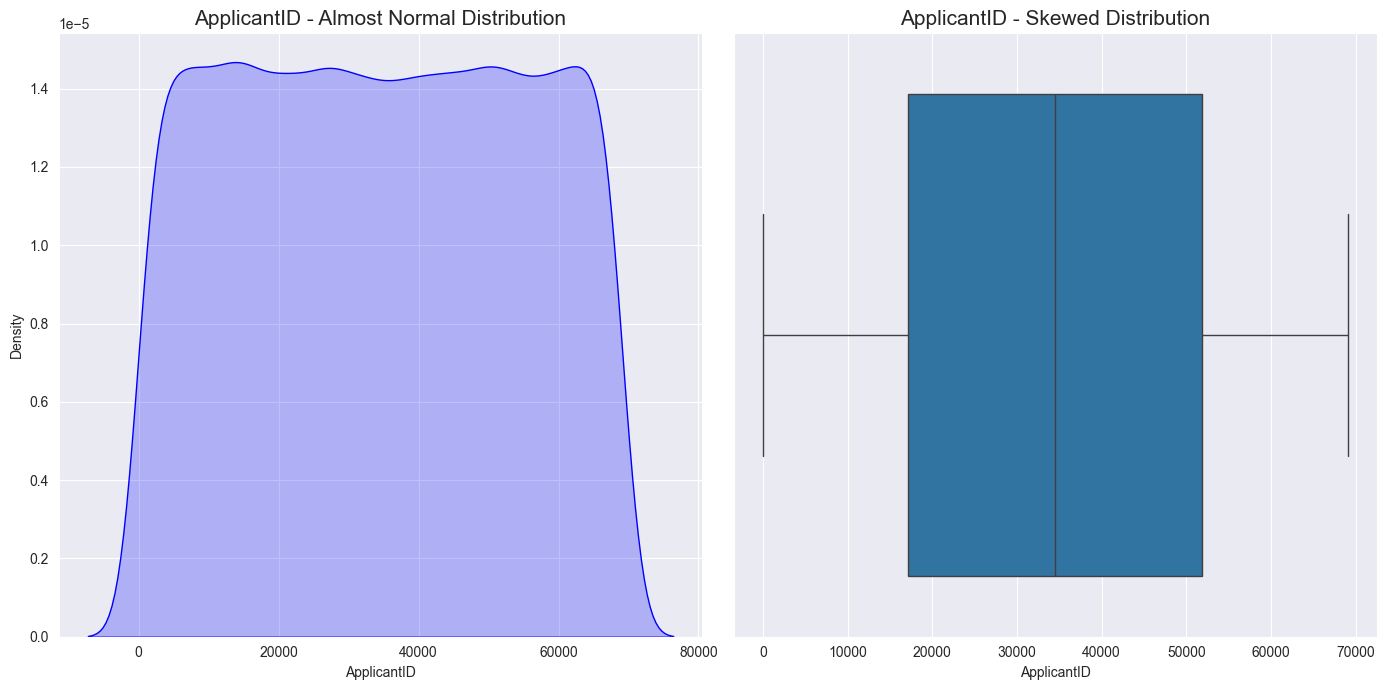

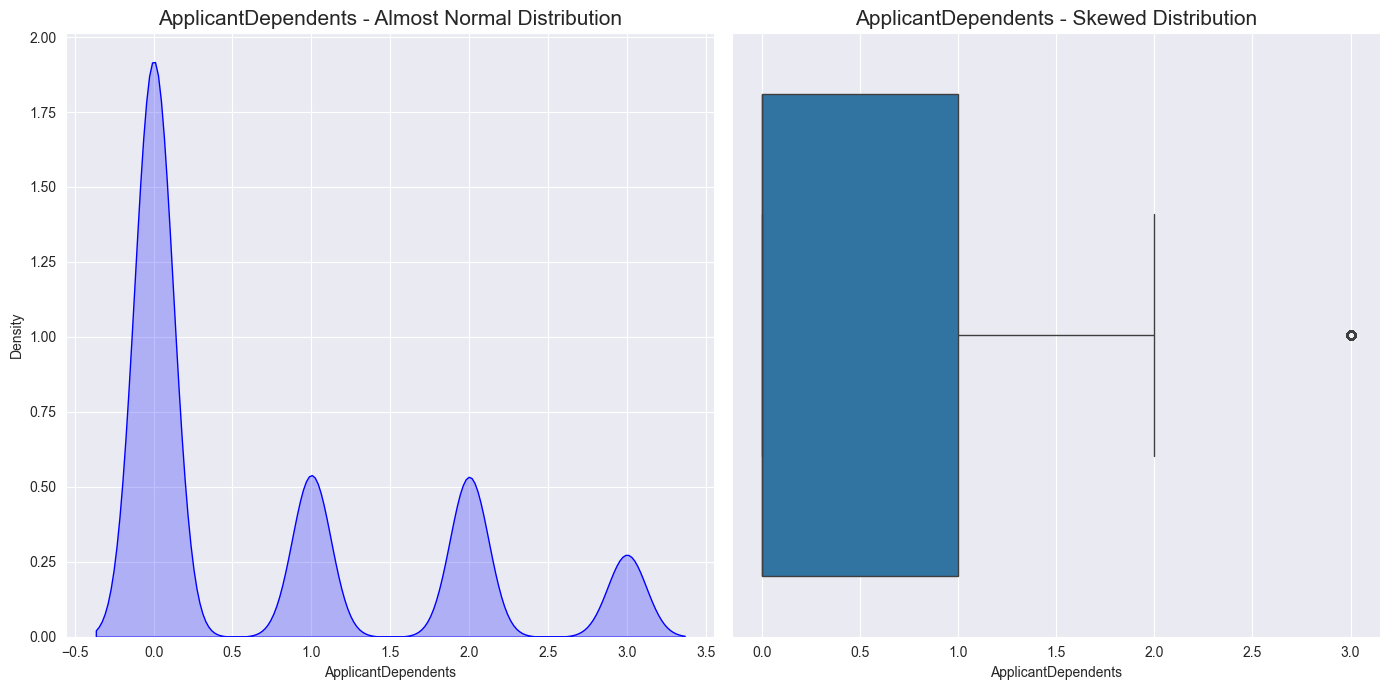

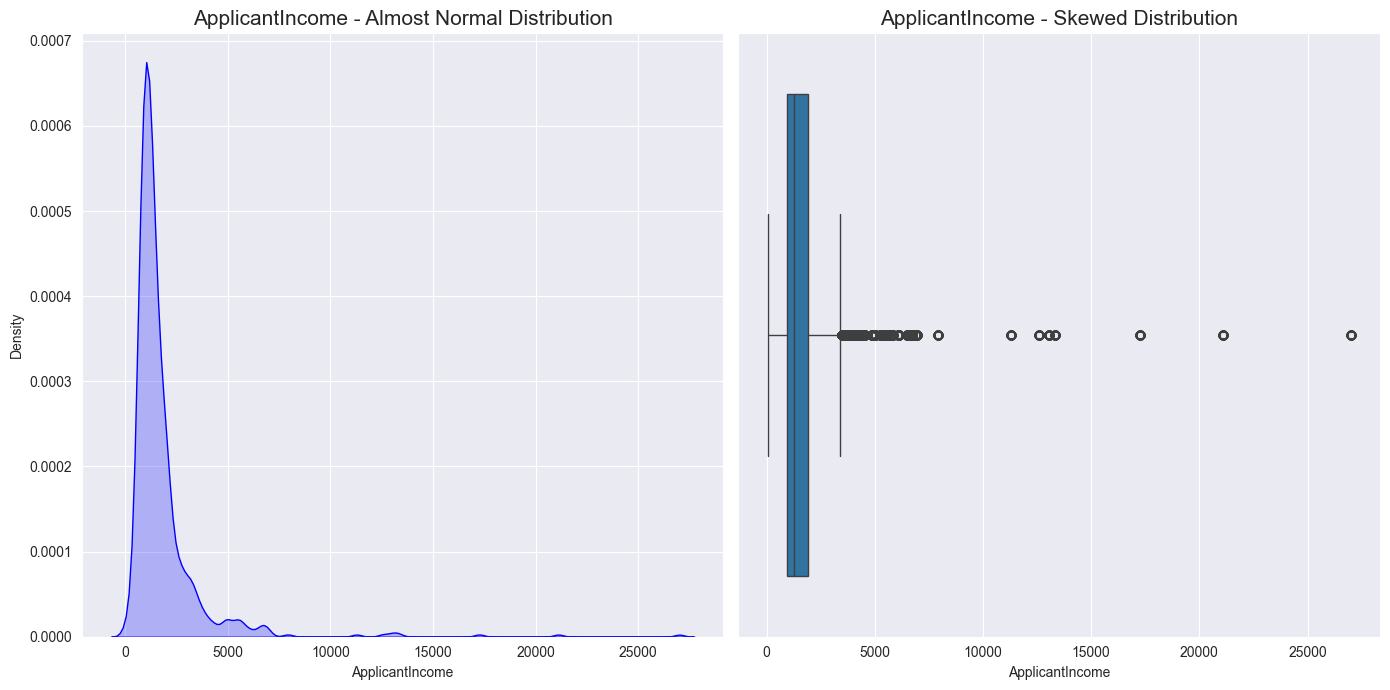

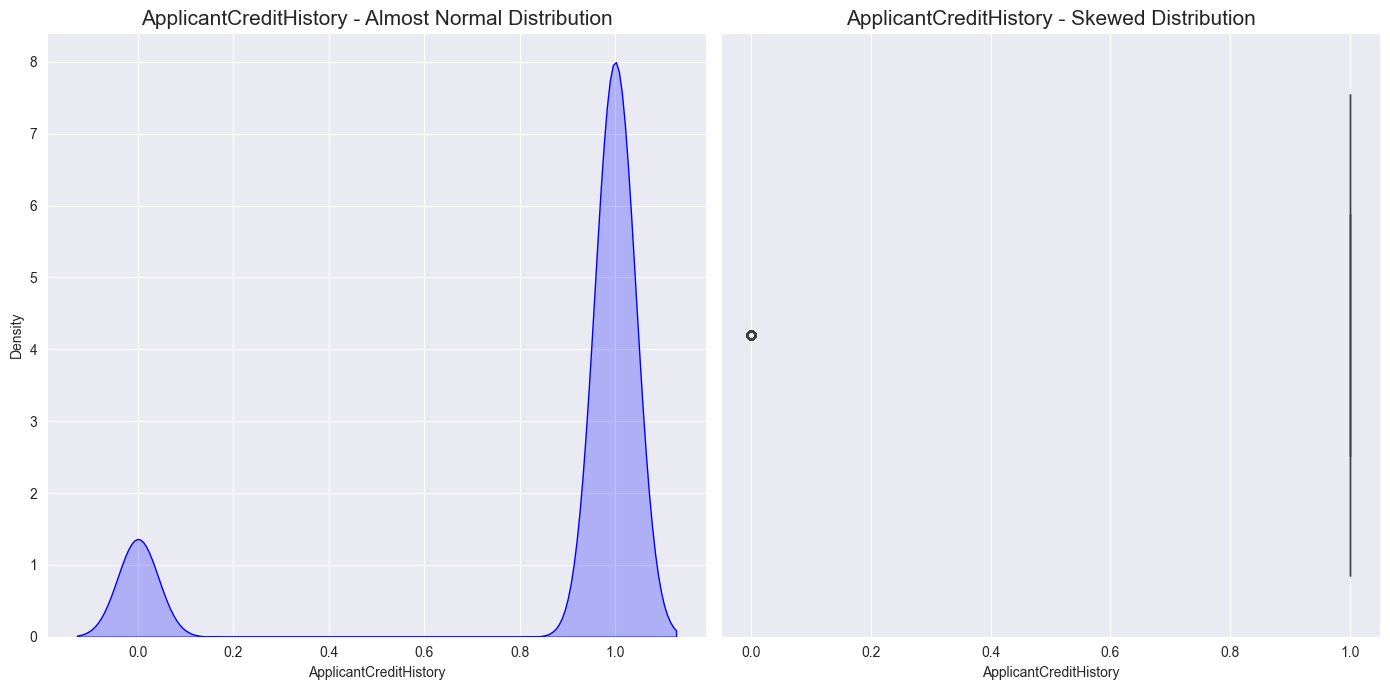

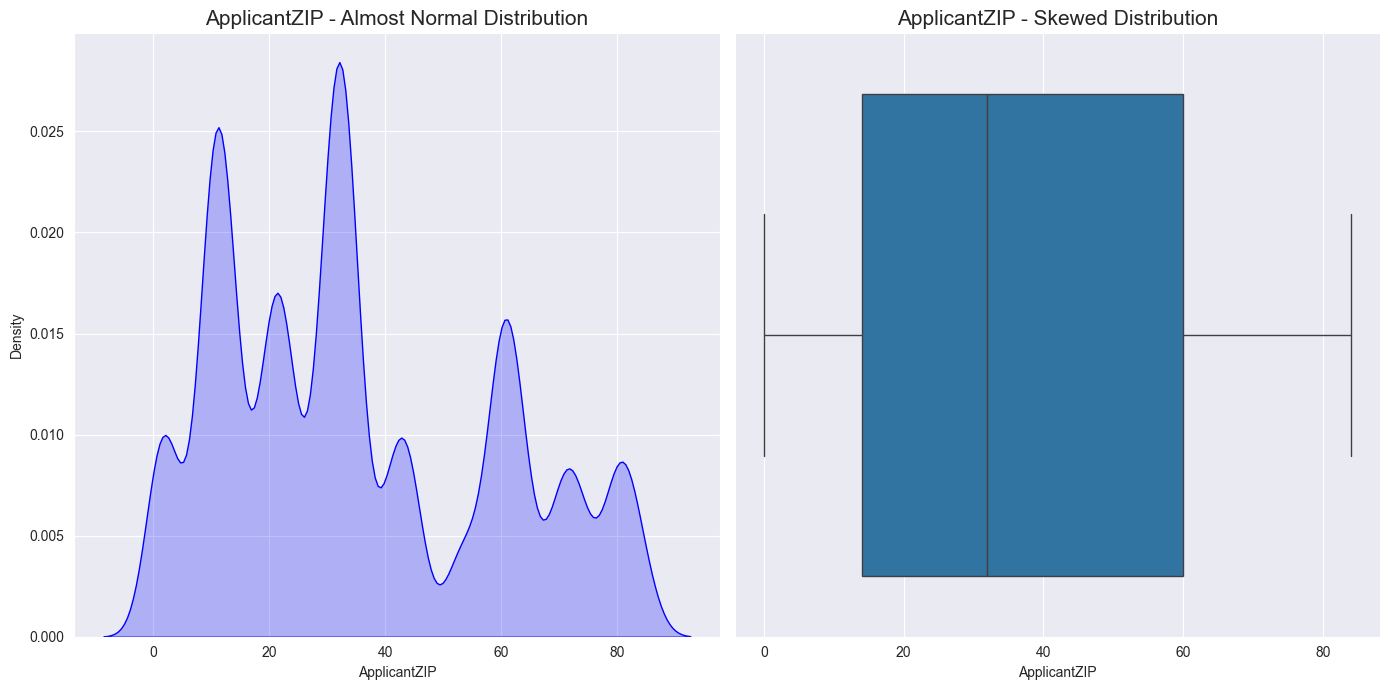

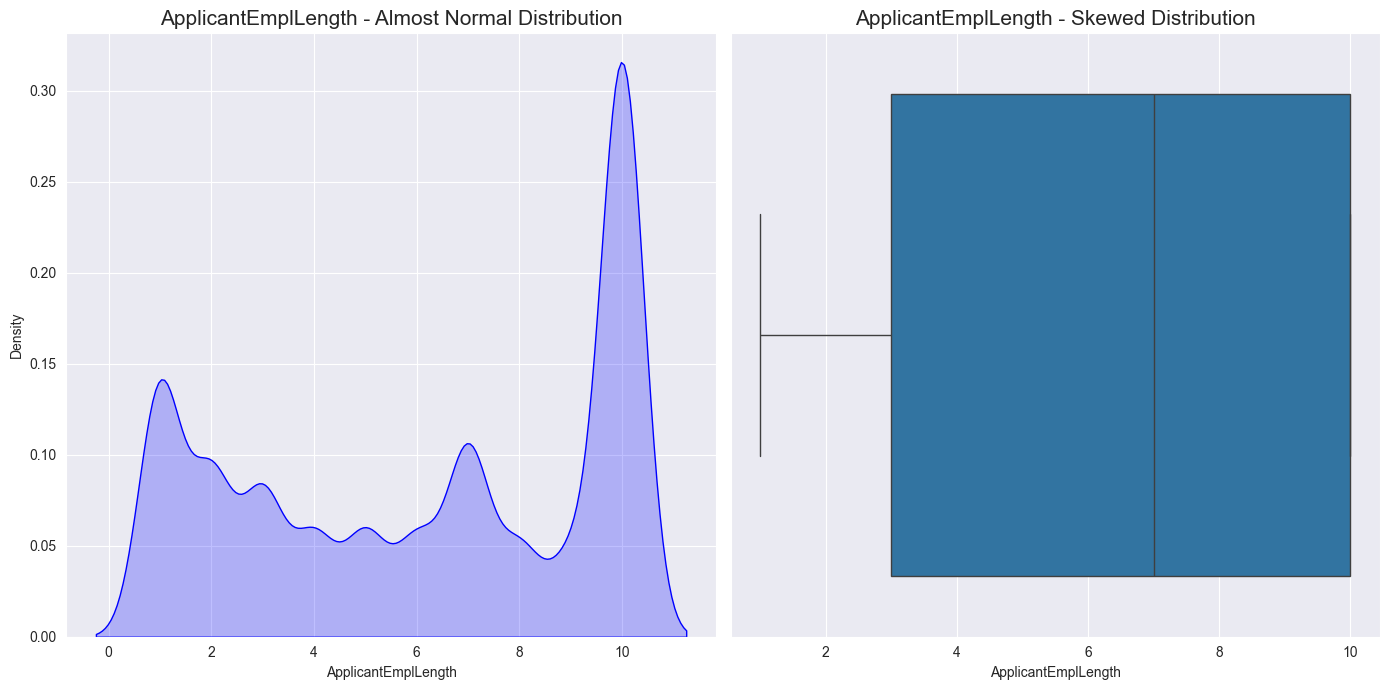

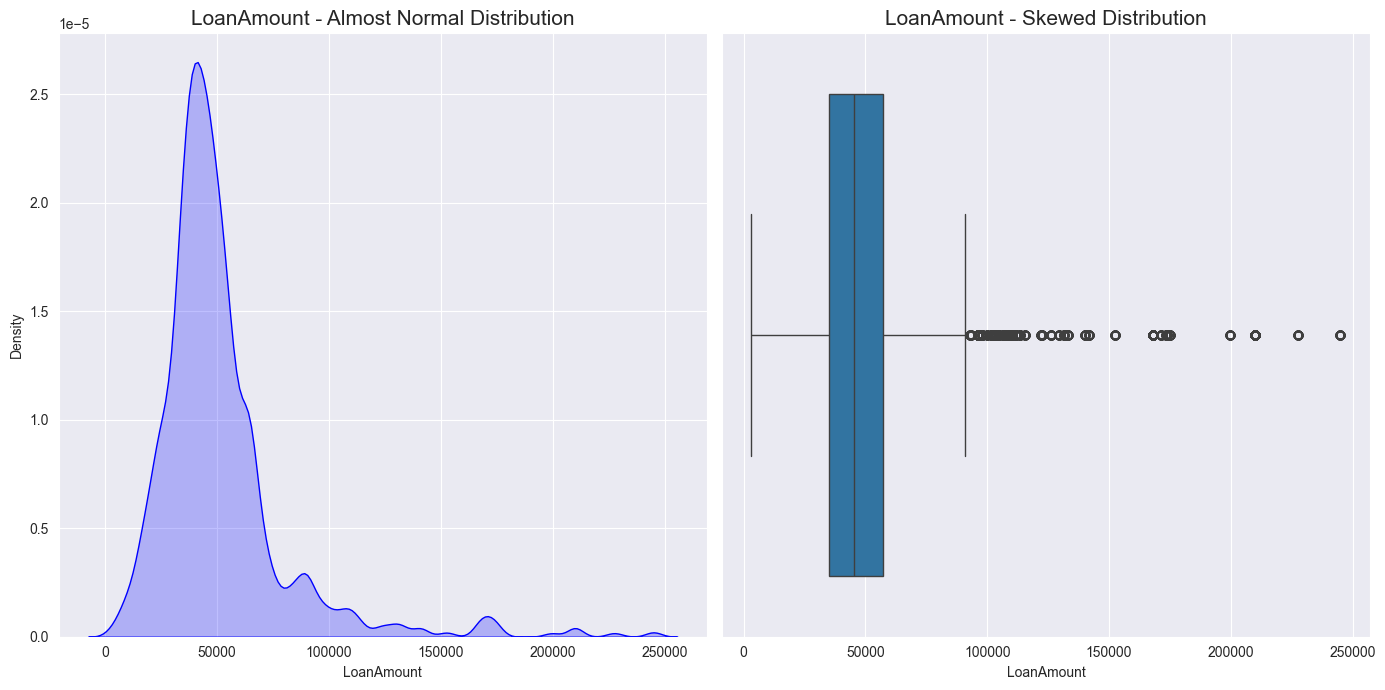

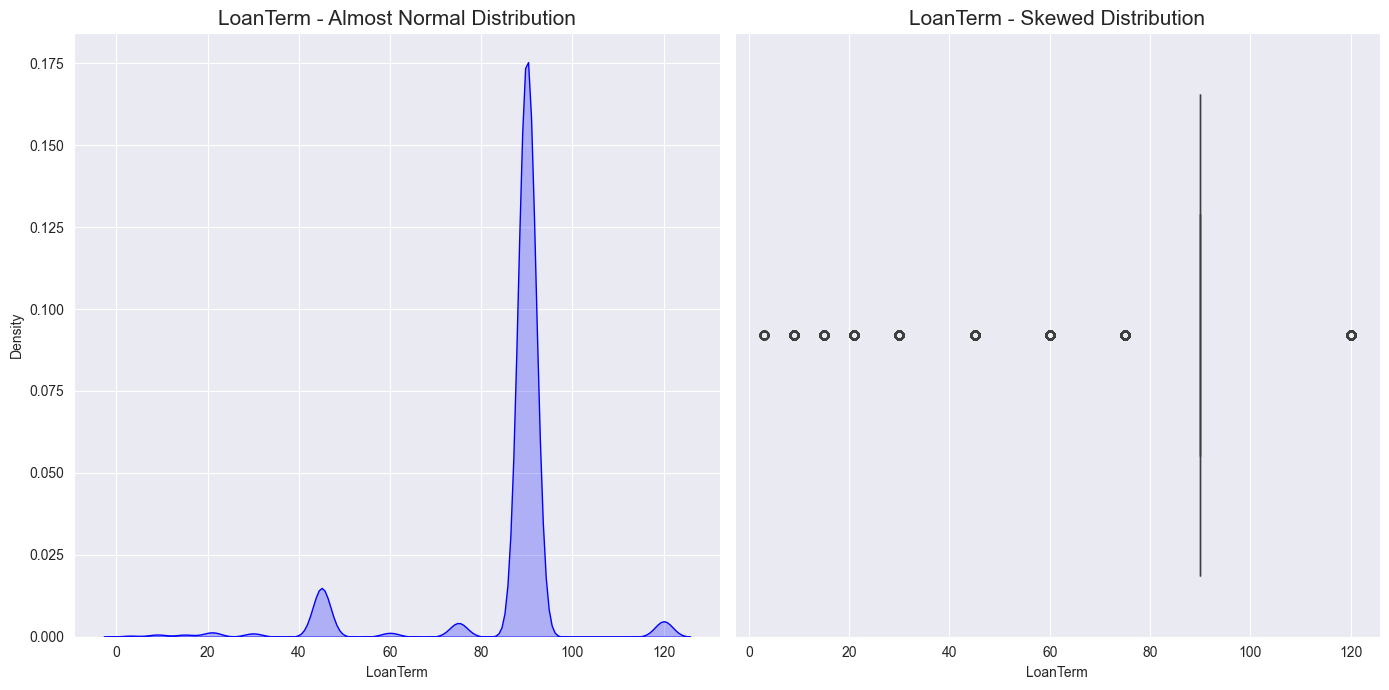

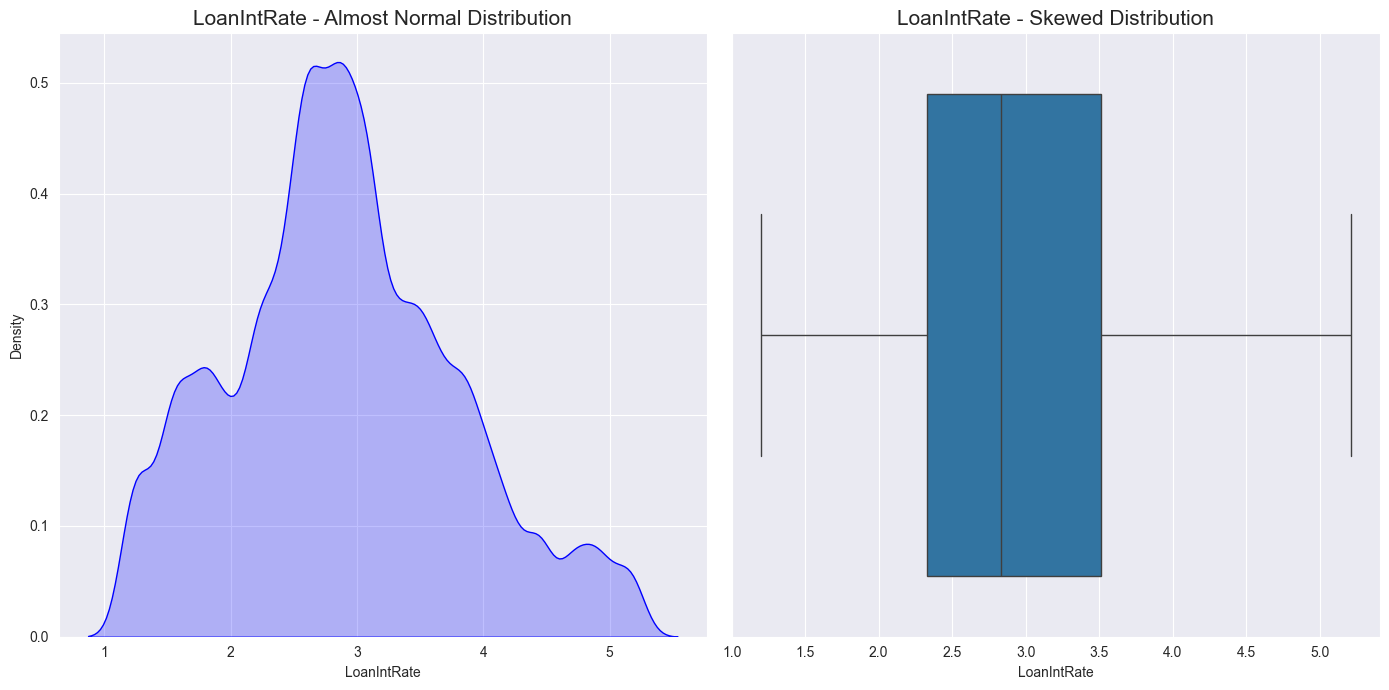

In [63]:
# taking the numerical columns
numeric_columns1 = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns1:
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Kernel Density Estimation Plot
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=df[column], fill=True, color="blue")
    
    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=df[column], orient="h")
    
    plt.tight_layout()
    plt.show()

The function below detect_outliers_with_plot(df) is used to detect and visualize outliers in the numeric columns of a DataFrame df. It removes outliers based on the Interquartile Range (IQR) method and displays boxplots to visualize the data distribution.

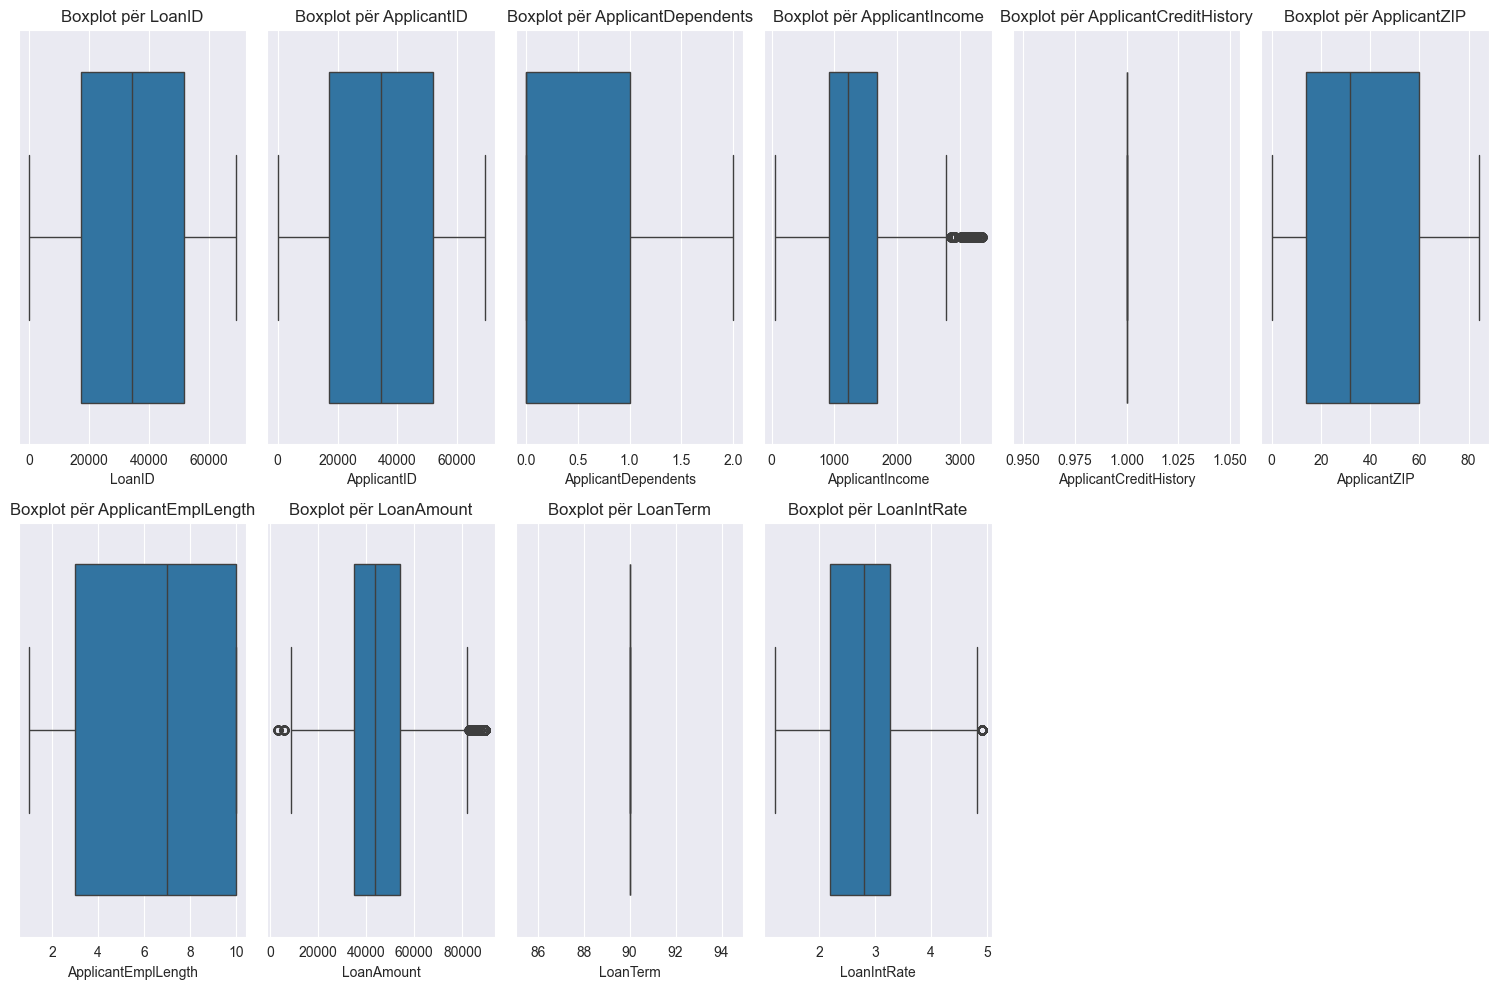

In [64]:
def detect_outliers_with_plot(df):
   
   #taking the numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    #making a copy of the dataset
    df_cleaned = df.copy()
    
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_columns, 1):
        # Calculate Quartiles and IQR
        
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        
        # for each column a boxplot is created using Seaborn's boxplot function to visualize the distribution of the cleaned data (after outliers are removed)
        plt.subplot(2, len(numeric_columns) // 2 + 1, i)
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot për {col}')
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned

df_cleaned = detect_outliers_with_plot(df)

In [65]:
# Calculation of the first and third quartiles
Q1 = df['LoanAmount'].quantile(0.25)  # 25% percentile (Q1)
Q3 = df['LoanAmount'].quantile(0.75)  # 75% percentile (Q3)
IQR = Q3 - Q1  # Interquartile Range (IQR), which is the difference between Q3 and Q1

# Detecting outliers
outliersLoanAmount = df[(df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount'] > (Q3 + 1.5 * IQR))]
# Filter rows where LoanAmount is less than the lower bound or greater than the upper bound of the IQR

print("Numri i zbulimeve jo të sakta:", len(outliersLoanAmount))  
# Prints the number of outliers detected in the 'LoanAmount' column


Numri i zbulimeve jo të sakta: 2506


In [66]:
# Calculation of Q1 and Q3 for 'ApplicantIncome'
Q1 = df['ApplicantIncome'].quantile(0.25)  
Q3 = df['ApplicantIncome'].quantile(0.75)  
IQR = Q3 - Q1  

outliersApplicantIncome = df[(df['ApplicantIncome'] < (Q1 - 1.5 * IQR)) | (df['ApplicantIncome'] > (Q3 + 1.5 * IQR))]

print("Numri i zbulimeve jo të sakta ne ApplicantIncome:", len(outliersApplicantIncome))  


Numri i zbulimeve jo të sakta ne ApplicantIncome: 3133


In [67]:
df_cleaned

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved
0,56026,19874,Male,NE,0.0,Diplomiral,NE,1949.666667,1.0,33,5.0,STANOVANJSKI KREDIT,51087.0,90.0,1.42,prenova,Y
1,53884,34258,Male,DA,1.0,Diplomiral,NE,1527.666667,1.0,64,10.0,NAJEM,44800.0,90.0,3.90,drugo,N
2,48350,66552,Male,DA,0.0,Brez diplome,NE,861.000000,1.0,30,3.0,NAJEM,42000.0,90.0,2.80,Unknown,Y
3,30455,54844,Male,DA,2.0,Diplomiral,NE,1066.666667,1.0,84,1.0,NAJEM,24500.0,90.0,3.26,Unknown,Y
4,935,18820,Male,DA,2.0,Diplomiral,NE,833.333333,1.0,60,10.0,STANOVANJSKI KREDIT,38150.0,90.0,3.26,Unknown,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,62223,30205,Male,DA,2.0,Brez diplome,NE,730.666667,1.0,11,7.0,NAJEM,44800.0,90.0,4.74,Unknown,Y
38760,51071,57493,Male,NE,0.0,Diplomiral,NE,1271.333333,1.0,14,6.0,STANOVANJSKI KREDIT,39200.0,90.0,3.65,Unknown,Y
38762,19296,7212,Male,DA,1.0,Diplomiral,NE,873.333333,1.0,14,7.0,NAJEM,57750.0,90.0,2.89,kartica,Y
38763,20271,32616,Male,NE,0.0,Diplomiral,NE,3107.666667,1.0,63,3.0,STANOVANJSKI KREDIT,17500.0,90.0,1.52,Unknown,Y


In [68]:
# Correlation between numerical columns
df_cleaned.corr(numeric_only=True)

,LoanID,ApplicantID,ApplicantDependents,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,LoanAmount,LoanTerm,LoanIntRate
LoanID,1.000000,0.005171,0.002953,-0.000646,NaN,0.002045,-0.008695,-0.003956,NaN,-0.002340
ApplicantID,0.005171,1.000000,0.012079,0.005831,NaN,-0.002014,0.006084,0.007989,NaN,0.008097
ApplicantDependents,0.002953,0.012079,1.000000,0.010119,NaN,-0.000406,-0.006309,0.005795,NaN,-0.002162
ApplicantIncome,-0.000646,0.005831,0.010119,1.000000,NaN,0.015338,0.006257,0.002528,NaN,0.000516
ApplicantCreditHistory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantZIP,0.002045,-0.002014,-0.000406,0.015338,NaN,1.000000,-0.004786,-0.004955,NaN,0.012615
ApplicantEmplLength,-0.008695,0.006084,-0.006309,0.006257,NaN,-0.004786,1.000000,-0.005266,NaN,0.052898
LoanAmount,-0.003956,0.007989,0.005795,0.002528,NaN,-0.004955,-0.005266,1.000000,NaN,0.001213
LoanTerm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanIntRate,-0.002340,0.008097,-0.002162,0.000516,NaN,0.012615,0.052898,0.001213,NaN,1.000000


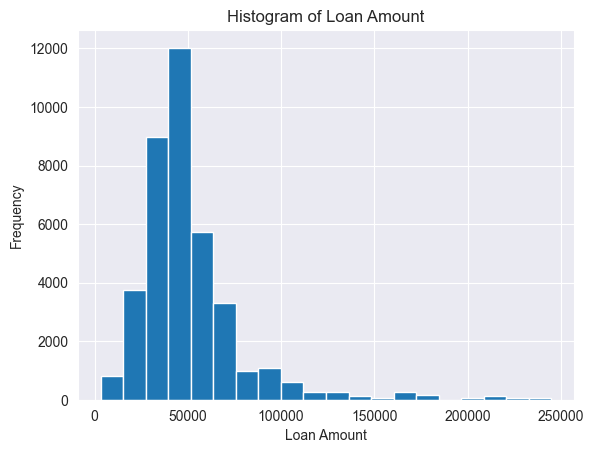

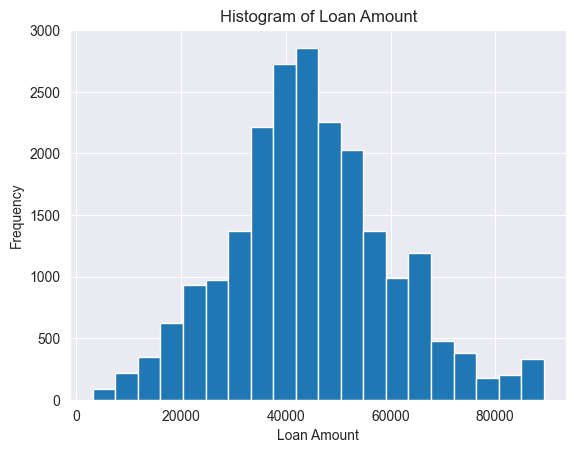

In [69]:
# Histogram for data distribution before cleaning
df['LoanAmount'].hist(bins=20)  # Creating a histogram for 'LoanAmount' with 20 bins
plt.title('Histogram of Loan Amount')  
plt.xlabel('Loan Amount')  
plt.ylabel('Frequency')  
plt.show() 

# Histogram for data distribution after cleaning
df_cleaned['LoanAmount'].hist(bins=20)  # Creating a histogram for 'LoanAmount' after cleaning with 20 bins
plt.title('Histogram of Loan Amount')  
plt.xlabel('Loan Amount') 
plt.ylabel('Frequency') 
plt.show()  


Histogram for data distribution 

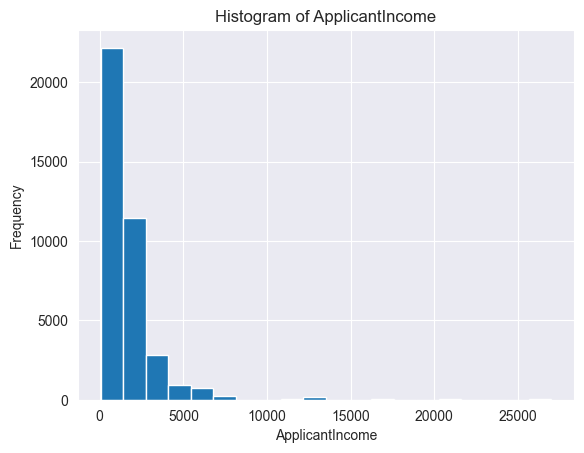

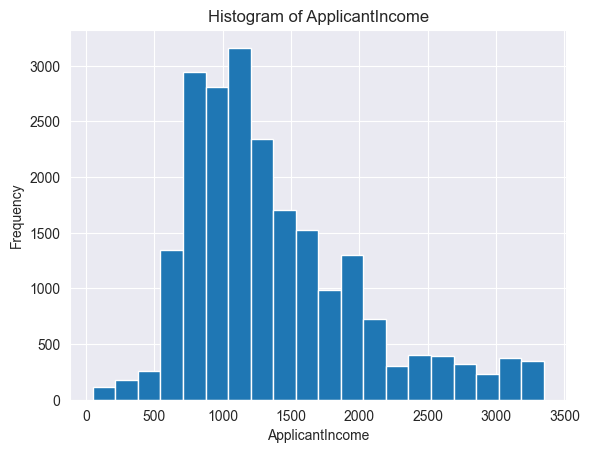

In [70]:
#Histogram for data distribution before cleaning
df['ApplicantIncome'].hist(bins=20)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()
#Histogram for data distribution after cleaning
df_cleaned['ApplicantIncome'].hist(bins=20)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

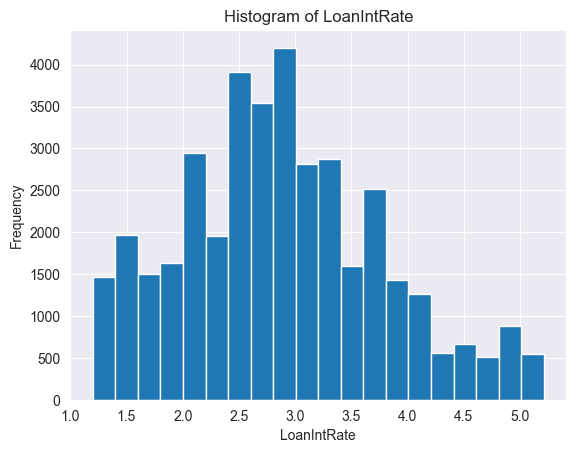

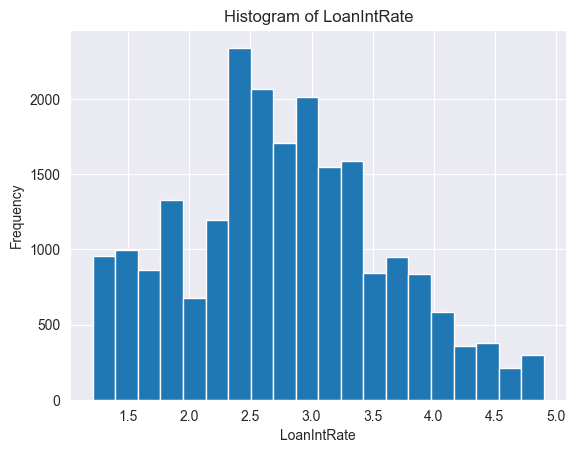

In [71]:
df['LoanIntRate'].hist(bins=20)
plt.title('Histogram of LoanIntRate')
plt.xlabel('LoanIntRate')
plt.ylabel('Frequency')
plt.show()

df_cleaned['LoanIntRate'].hist(bins=20)
plt.title('Histogram of LoanIntRate')
plt.xlabel('LoanIntRate')
plt.ylabel('Frequency')
plt.show()

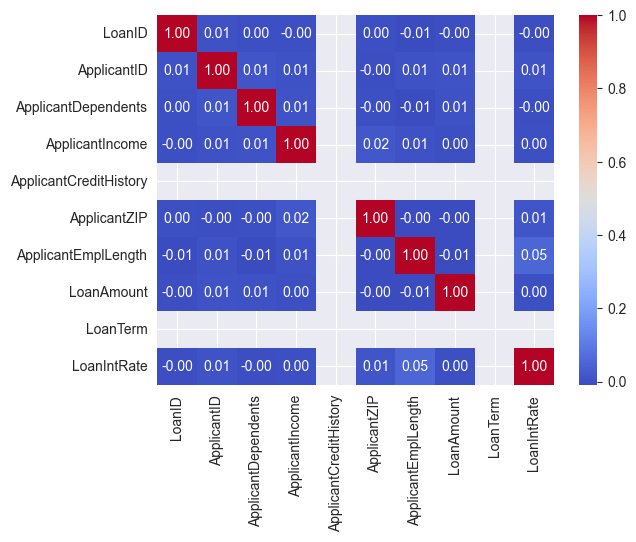

In [72]:
# Heatmap for correlation between numeric columns
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [73]:
# plotScatterMatrix function is useful for visualizing pairwise relationships between numerical features in a dataset
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15676\3543444238.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


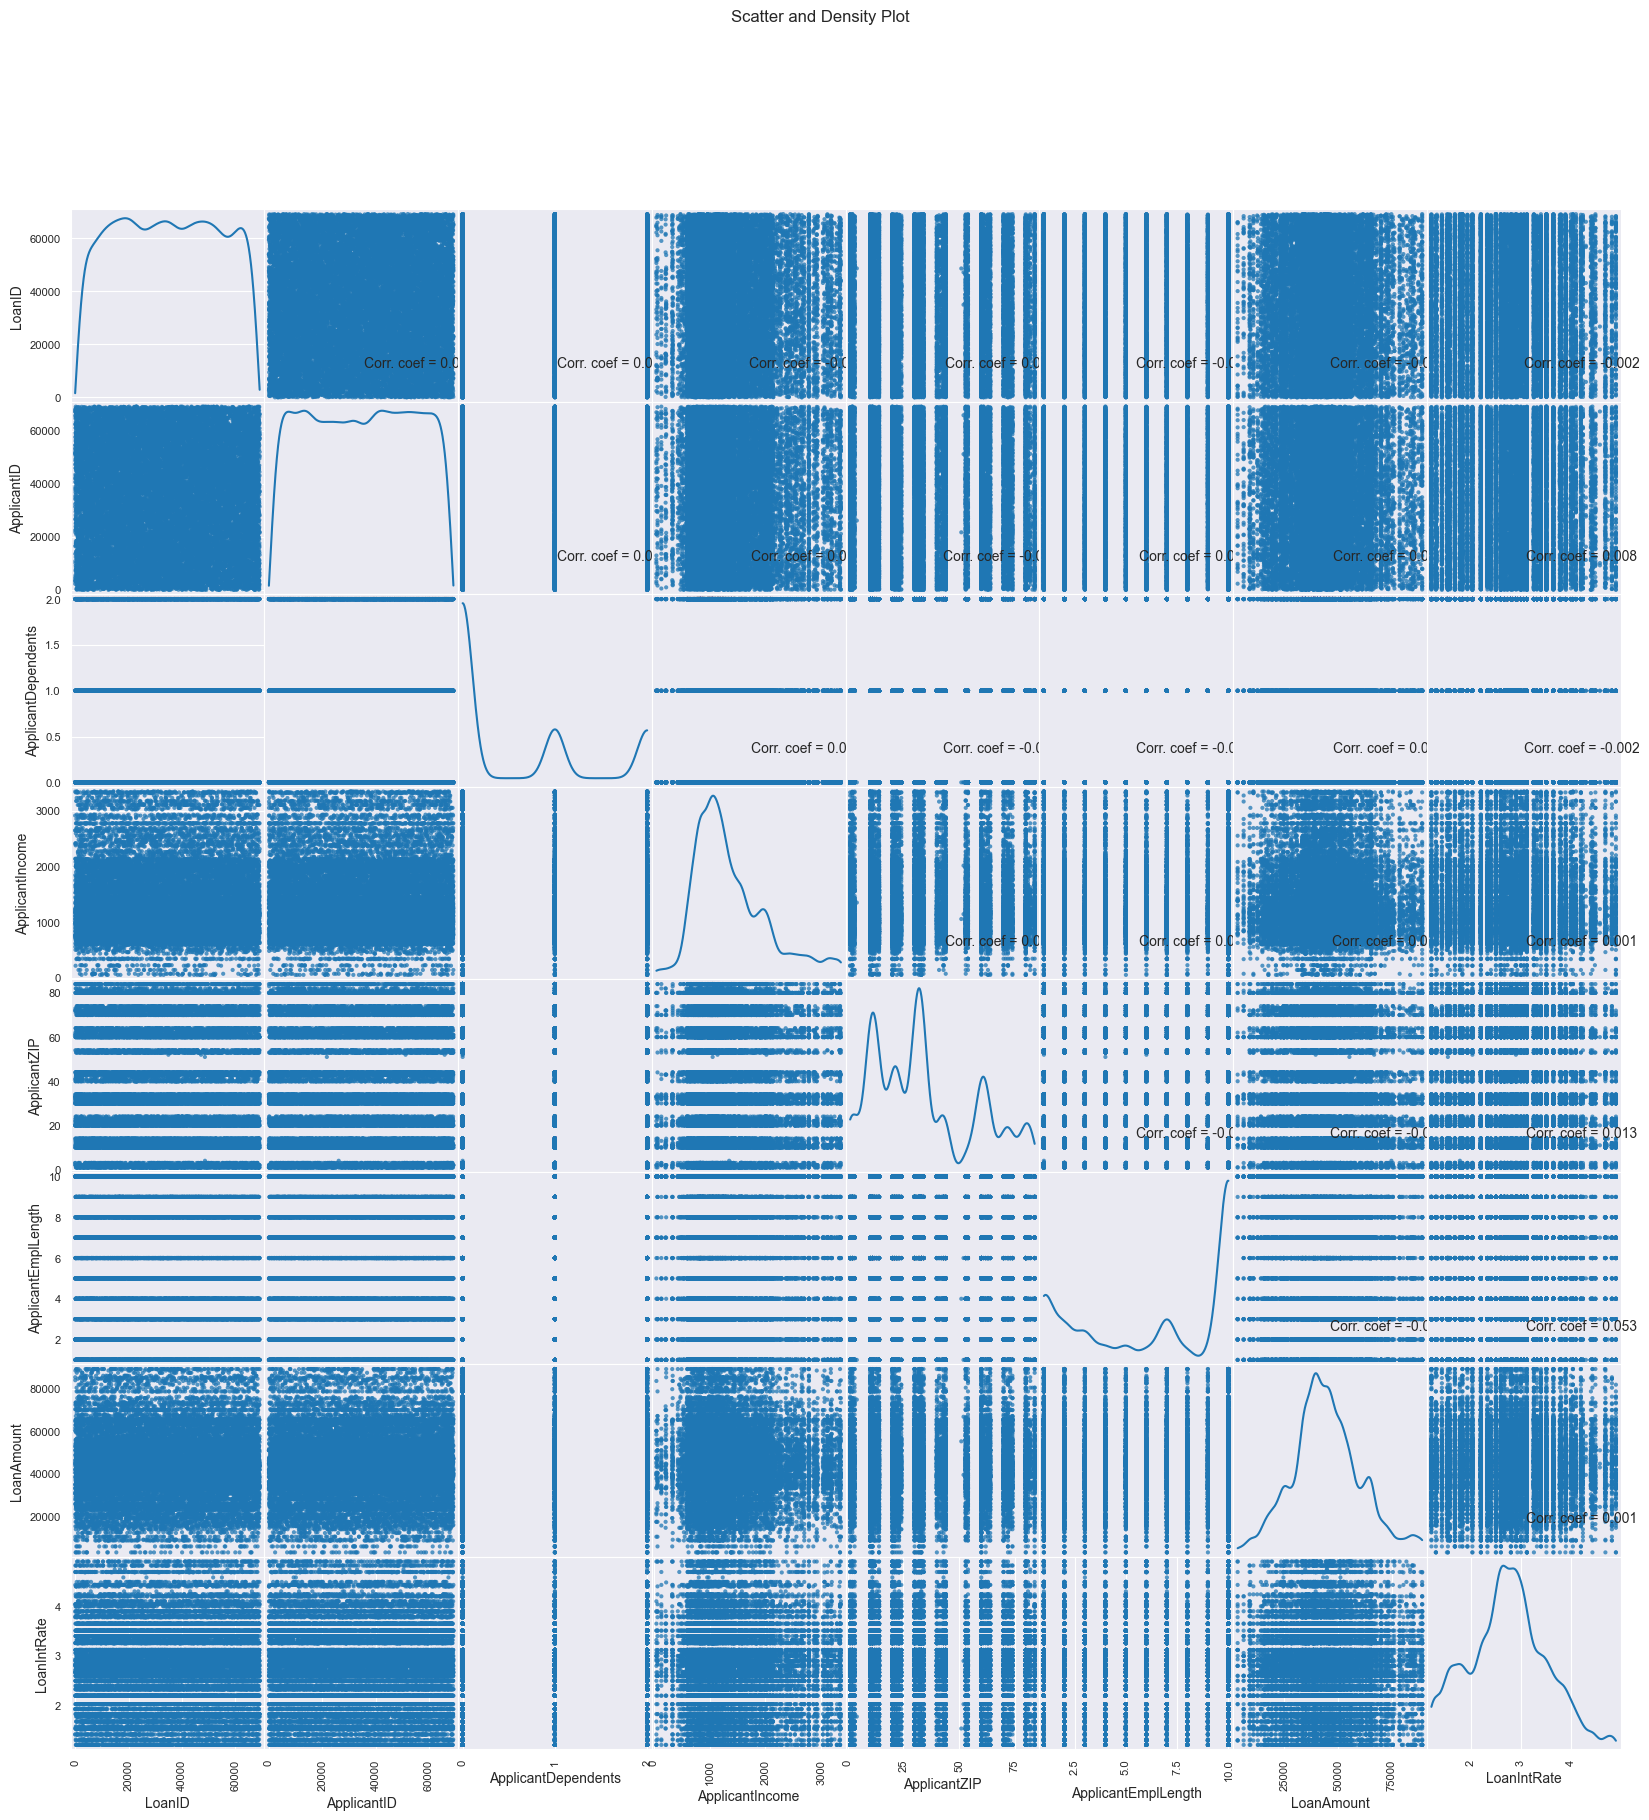

In [74]:
plotScatterMatrix(df_cleaned, 20, 10)

In [75]:
# The average of LoanAmount
mean = df_cleaned['LoanAmount'].mean()
# The standard deviation of LoanAmount
std_dev = df_cleaned['LoanAmount'].std()

print(f"Mesatarja e LoanAmount: {mean}")
print(f"Devijimi standard i LoanAmount: {std_dev}")


percentiles = df_cleaned['LoanAmount'].quantile([0.25, 0.5, 0.75])
print(f"Percentilet e LoanAmount: \n{percentiles}")

Mesatarja e LoanAmount: 44636.36517422083
Devijimi standard i LoanAmount: 15638.731039560082
Percentilet e LoanAmount: 
0.25    35000.0
0.50    43750.0
0.75    53900.0
Name: LoanAmount, dtype: float64


In [76]:
group_approved = df_cleaned[df_cleaned['LoanApproved'] == 'Y']['ApplicantIncome']
group_not_approved = df_cleaned[df_cleaned['LoanApproved'] == 'N']['ApplicantIncome']

#  It performs an ANOVA test to check if there is a significant difference in ApplicantIncome between the two groups
anova_result = stats.f_oneway(group_approved, group_not_approved)
print(f"Rezultati ANOVA - p-value: {anova_result.pvalue}")

Rezultati ANOVA - p-value: 0.19681765332366513


In [77]:
df_cleaned

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved
0,56026,19874,Male,NE,0.0,Diplomiral,NE,1949.666667,1.0,33,5.0,STANOVANJSKI KREDIT,51087.0,90.0,1.42,prenova,Y
1,53884,34258,Male,DA,1.0,Diplomiral,NE,1527.666667,1.0,64,10.0,NAJEM,44800.0,90.0,3.90,drugo,N
2,48350,66552,Male,DA,0.0,Brez diplome,NE,861.000000,1.0,30,3.0,NAJEM,42000.0,90.0,2.80,Unknown,Y
3,30455,54844,Male,DA,2.0,Diplomiral,NE,1066.666667,1.0,84,1.0,NAJEM,24500.0,90.0,3.26,Unknown,Y
4,935,18820,Male,DA,2.0,Diplomiral,NE,833.333333,1.0,60,10.0,STANOVANJSKI KREDIT,38150.0,90.0,3.26,Unknown,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,62223,30205,Male,DA,2.0,Brez diplome,NE,730.666667,1.0,11,7.0,NAJEM,44800.0,90.0,4.74,Unknown,Y
38760,51071,57493,Male,NE,0.0,Diplomiral,NE,1271.333333,1.0,14,6.0,STANOVANJSKI KREDIT,39200.0,90.0,3.65,Unknown,Y
38762,19296,7212,Male,DA,1.0,Diplomiral,NE,873.333333,1.0,14,7.0,NAJEM,57750.0,90.0,2.89,kartica,Y
38763,20271,32616,Male,NE,0.0,Diplomiral,NE,3107.666667,1.0,63,3.0,STANOVANJSKI KREDIT,17500.0,90.0,1.52,Unknown,Y


In [78]:
# T-test for comparing  ApplicantIncome for ApplicantGender
male_income = df_cleaned[df_cleaned['ApplicantGender'] == 'Male']['ApplicantIncome']
female_income = df_cleaned[df_cleaned['ApplicantGender'] == 'Female']['ApplicantIncome']

# T-test
t_stat, p_value = stats.ttest_ind(male_income, female_income)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.13768594006621337, P-value: 0.8904899061666572


In [79]:
# Correlation between  ApplicantIncome and LoanAmount
df_cleaned[['ApplicantIncome', 'LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.002528
LoanAmount,0.002528,1.000000


In [80]:
# Calculation of skewness and kurtosis
skewness = df_cleaned['LoanAmount'].skew()
kurtosis = df_cleaned['LoanAmount'].kurt()

print(f"Asimetri: {skewness}")
print(f"Kurtosi: {kurtosis}")

Asimetri: 0.29208597542419057
Kurtosi: 0.22453439515223206


In [81]:
education_income = [df_cleaned[df_cleaned['ApplicantEducation'] == ed]['ApplicantIncome'] for ed in df_cleaned['ApplicantEducation'].unique()]

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(*education_income)

# Display the results
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


ANOVA F-statistic: 0.3407759020275155, P-value: 0.5593877516162054


In [82]:
# define the list of numerical columns you want to analyze
numerical_cols = ['ApplicantIncome', 'LoanAmount', 'LoanIntRate']

# calculate summary statistics for the selected numerical columns
statistics = df_cleaned[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max']).T

# display the results
print("Statistikat përmbledhëse për kolonat numerike:")
print(statistics)


Statistikat përmbledhëse për kolonat numerike:
                         mean        median           std      min      max
ApplicantIncome   1375.112807   1208.333333    639.781544    50.00   3349.0
LoanAmount       44636.365174  43750.000000  15638.731040  3150.00  89250.0
LoanIntRate          2.766570      2.800000      0.829637     1.21      4.9


In [83]:
# list of categorical columns to analyze
categorical_cols = ['ApplicantGender', 'ApplicantMarried', 'LoanPurpose']

# print the distribution for categorical columns
print("\nShpërndarja për kolonat kategorike:")
for col in categorical_cols:
    print(f"\nShpërndarja për {col}:")
    print(df_cleaned[col].value_counts(normalize=True) * 100)



Shpërndarja për kolonat kategorike:

Shpërndarja për ApplicantGender:
Male      81.801048
Female    18.198952
Name: ApplicantGender, dtype: float64

Shpërndarja për ApplicantMarried:
DA    65.105268
NE    34.894732
Name: ApplicantMarried, dtype: float64

Shpërndarja për LoanPurpose:
Unknown            62.071343
kartica            24.386320
prenova             6.104624
drugo               4.339432
zdravljenje         0.928565
investicija         0.855015
selitev             0.514848
poèitnice           0.482670
stanovanje          0.280408
obnovljivi_viri     0.036775
Name: LoanPurpose, dtype: float64


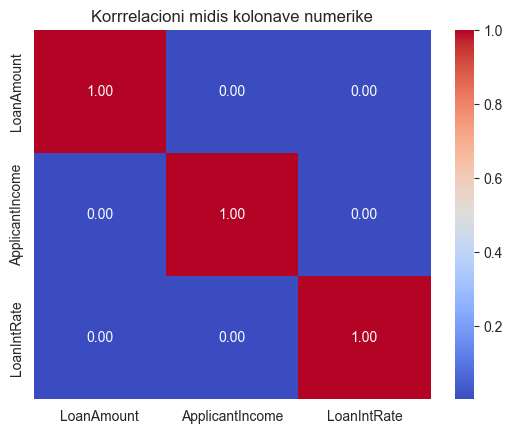

In [85]:
# Heatmap for numerical cols
numeric_cols = ['LoanAmount', 'ApplicantIncome', 'LoanIntRate']
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrrelacioni midis kolonave numerike")
plt.show()


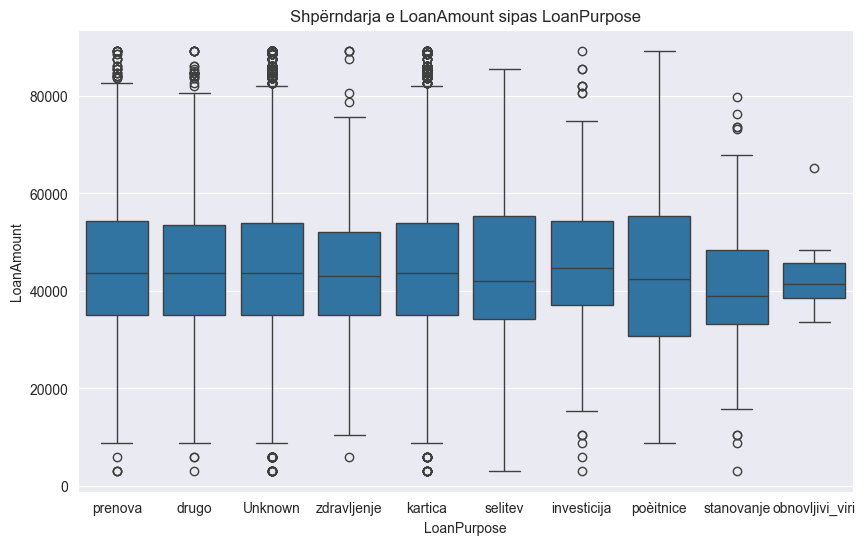

In [86]:
# Boxplot for LoanAmount and LoanPurpose
plt.figure(figsize=(10, 6))
sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df_cleaned)
plt.title("Shpërndarja e LoanAmount sipas LoanPurpose")
plt.show()

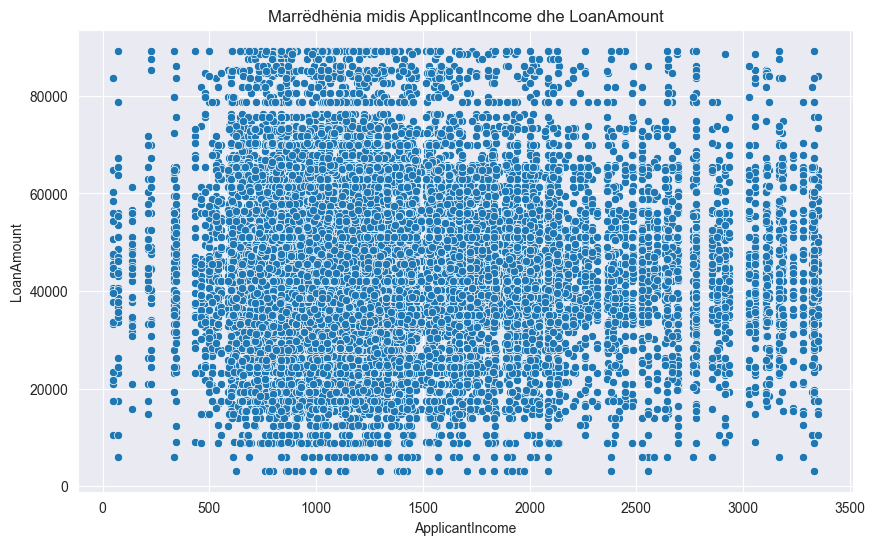

In [87]:
# Scatter plot for ApplicantIncome and LoanAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df_cleaned)
plt.title("Marrëdhënia midis ApplicantIncome dhe LoanAmount")
plt.show()

In [90]:
# distributon for numerical columns 
print("\nStatistika përmbledhëse për kolonat numerike:")
print(df_cleaned[numerical_cols].describe())

# distributon for categorical columns 
print("\nShpërndarja për kolonat kategorike:")
print(df_cleaned[categorical_cols].apply(lambda x: x.value_counts(normalize=True) * 100))




Statistika përmbledhëse për kolonat numerike:
       ApplicantIncome    LoanAmount   LoanIntRate
count     21754.000000  21754.000000  21754.000000
mean       1375.112807  44636.365174      2.766570
std         639.781544  15638.731040      0.829637
min          50.000000   3150.000000      1.210000
25%         916.666667  35000.000000      2.200000
50%        1208.333333  43750.000000      2.800000
75%        1680.666667  53900.000000      3.260000
max        3349.000000  89250.000000      4.900000

Shpërndarja për kolonat kategorike:
                 ApplicantGender  ApplicantMarried  LoanPurpose
DA                           NaN         65.105268          NaN
Female                 18.198952               NaN          NaN
Male                   81.801048               NaN          NaN
NE                           NaN         34.894732          NaN
Unknown                      NaN               NaN    62.071343
drugo                        NaN               NaN     4.339432
investici

Kruskal-Wallis test

In [92]:
# Get unique values in ApplicantEducation column
education_categories = df_cleaned['ApplicantEducation'].unique()

education_groups = [df_cleaned[df_cleaned['ApplicantEducation'] == category]['LoanAmount'] for category in education_categories]

# Run the Kruskal-Wallis test
kruskal_result = stats.kruskal(*education_groups)

print(f"Rezultati Kruskal-Wallis për LoanAmount dhe ApplicantEducation - p-value: {kruskal_result.pvalue}")


Rezultati Kruskal-Wallis për LoanAmount dhe ApplicantEducation - p-value: 0.20430355464274752
